# Screen ``tpp/uh``
The goal of this screen is to see if we can make an iducible sgRNA by inserting the thiamine pyrophospate (tpp) aptamer  into the hairpin domain.  The ``uh`` library focuses on the nucleotides in the nexus and the nucleotides that connect the nexus to the hairpin.  I didn't find anything when I screened this library with the ammeline aptamer, but the tpp aptamer binds its ligand much more tightly, so I'm hoping for better results this time.

### Design primers

In [1]:
!../scripts/clone_into_sgrna.py     \
    'tpp/mhf/30 -b on'              \
    -b tpp/mhf/30                   \
    'tpp/uh/4/6 -c 7'               \
    'tpp/uh/4/7 -c 7'               \
    'tpp/uh/5/6 -c 8'               \
    'tpp/uh/5/7 -c 8'               \
    'tpp/uh/6/6 -c 9'               \


Number of oligos: 7
Max primer length: 64

Primer names (ready to copy into Elim form):
TPP_MHF_30_FOR
TPP_MHF_30_REV
TPP_UH_4_6_FOR, TPP_UH_5_6_FOR, TPP_UH_6_6_FOR
TPP_UH_4_6_REV, TPP_UH_4_7_REV
TPP_UH_4_7_FOR, TPP_UH_5_7_FOR
TPP_UH_5_6_REV, TPP_UH_5_7_REV
TPP_UH_6_6_REV

Primer sequences (ready to copy into Elim form):
TGAGAAATACCCGTATCACCTGATCTGGATAATGCCAGCGTAGGGAACGACggcaccgagtcgg
GCCTTCACGCAGAAGGGCACCCCGACGGCGTATACGGGACACccttatttcaacttgctatgc
NNNNNNgccgtcggggtg
GGANNNNccttatttcaacttgctatgc
NNNNNNNgccgtcggggtg
GGANNNNNccttatttcaacttgctatgc
GGANNNNNNccttatttcaacttgctatgc


Recommended $T_m = 60C$

### Library prep protocol

In [2]:
!../protocols/library_prep.py 5 -t 60

1. Prepare each 10x primer mix:

   Reagent           Conc  Each Rxn
   ────────────────────────────────
   water                   38.00 μL
   forward primer  200 μM   1.00 μL
   reverse primer  200 μM   1.00 μL
   ────────────────────────────────
                           40.00 μL

2. Setup 5 PCR reactions and 1 negative control:

   Reagent             Conc   Each Rxn  Master Mix
   ───────────────────────────────────────────────
   water                      38.00 μL   228.00 μL
   primer mix           10x   10.00 μL            
   template DNA   100 pg/μL    2.00 μL    12.00 μL
   Q5 master mix         2x   50.00 μL   300.00 μL
   ───────────────────────────────────────────────
                             100.00 μL    90.00 μL/rxn

3. Run the following thermocycler protocol:

   98°C → 98°C → 60°C → 72°C → 72°C → 12°C
   0:30   0:10   0:20   2:00   2:00    ∞
         └──────────────────┘
                  35x

4. Add 1 μL (20 units) DpnI to each reaction and 
   incubate at 37°C

### GFP Top10 transformation

In [21]:
sys.path.append('../scripts')
from count_transformants import record_transformants
record_transformants(
        ('tpp uh 4,6', 1000, 40, [31 + 50]),
        ('tpp uh 4,7', 1000, 40, [40 + 37]),
        ('tpp uh 5,6', 1000, 40, [33 + 29]),
        ('tpp uh 5,7', 3000, 40, [28 + 35]),
        ('tpp uh 6,6', 3000, 40, [28 + 33]),
)

Library,Recover (μL),Plate (μL),# cfu/10⁵,# Transformants,# Unique,Coverage (%),Coverage (fold)
"tpp uh 4,6",1000,40,81,2.02×10⁸,1048576,100.00%,193.12x
"tpp uh 4,7",1000,40,77,1.93×10⁸,4194304,100.00%,45.90x
"tpp uh 5,6",1000,40,62,1.55×10⁸,4194304,100.00%,36.95x
"tpp uh 5,7",3000,40,63,4.72×10⁸,16777216,100.00%,28.16x
"tpp uh 6,6",3000,40,61,4.57×10⁸,16777216,100.00%,27.27x


#### Miniprep yields

Library    | Yield (ng/uL)
---------- | ------------:
tpp uh 4,6 | 138.2
tpp uh 4,7 | 327.1
tpp uh 5,6 | 369.0
tpp uh 5,7 | 498.0
tpp uh 6,6 | 578.2

### GFP MG1655 transformation

In [4]:
N = 1048576 + 4194304 + 4194304 + 16777216 + 16777216
record_transformants(
        (('tpp uh', N), 3000, 40, [2 + 2, 19 + 19]),
)

Library,Recover (μL),Plate (μL),# cfu/10⁵,# cfu/10⁴,# Transformants,# Unique,Coverage (%),Coverage (fold)
tpp uh,3000,40,4,38,2.86×10⁷,20906292,48.63%,0.67x


This was not a very good transformation.  I skipped the phenol chloroform extraction, but in the future I probably shouldn't.  I'm going to move forward with this anyways, because this is still about as many cells as I can sort.

### GFP screens

In [5]:
!../protocols/library_screen.py -v

1. Prepare the following reagents:

   Reagent  Description
   ─────────────────────────────────────────────────
   LBCC     LB, 100 μg/mL carbenicillin, 35 μg/mL 
            chloramphenicol
   LBCC54   LB, 125 μg/mL carbenicillin, 43 μg/mL 
            chloramphenicol
   EZCCA    MOPS EZ rich defined media (Teknova 
            M2105), 0.1% glucose, 100 μg/mL 
            carbenicillin, 35 μg/mL chloramphenicol, 
            1 μg/mL anhydrotetracycline
   EZCCAT   EZCCA, 1 mM theophylline

2. Make overnight cultures for the library and the 
   controls.

   - Thaw a glycerol stock of MG1655 cells containing 
     the library on ice for ≈10 min.

   - Add 1 mL of thawed glycerol stock to 50 mL LBCC.

   - Inoculate 1 mL LBCC with stabs from glycerol 
     stocks for the positive and negative controls.

   - Grow all the cultures overnight at 37°C.

3. Grow the library and the controls with and without 
   theophylline, while inducing Cas9.

   - Dilute enough of the library to get at 

First screen:
- Overnight volume: 40 mL
- Media volume: 175 μL
- Condition: holo
- Gate: 6.1% most on (seemed to increase to ≈8.0% as the screen went on)
- Event rate: 18,000 evt/sec
- Sort time: 3h00
- Remaining variants: 1.21×10⁶
- Coverage: 96.55% (3.37x)

Second scren:
- Overnight volume: 4 mL
- Media volume: 16 μL
- Condition: apo
- Gate: 5.0% most on (seemed to decrease to ≈2.5% as the screen went on)
- Event rate: 5,000 evt/sec
- Sort time: 2h00
- Remaining variants: 3.02×10⁴
- Coverage: 99.99% (9.64x)

### GFP to RFP PCR

In [6]:
!../protocols/library_prep.py 1

1. Prepare each 10x primer mix:

   Reagent           Conc  Each Rxn
   ────────────────────────────────
   water                   38.00 μL
   forward primer  200 μM   1.00 μL
   reverse primer  200 μM   1.00 μL
   ────────────────────────────────
                           40.00 μL

2. Setup 1 PCR reaction and 1 negative control:

   Reagent             Conc   Each Rxn  Master Mix
   ───────────────────────────────────────────────
   water                      38.00 μL    76.00 μL
   primer mix           10x   10.00 μL            
   template DNA   100 pg/μL    2.00 μL     4.00 μL
   Q5 master mix         2x   50.00 μL   100.00 μL
   ───────────────────────────────────────────────
                             100.00 μL    90.00 μL/rxn

3. Run the following thermocycler protocol:

   98°C → 98°C → 60°C → 72°C → 72°C → 12°C
   0:30   0:10   0:20   2:00   2:00    ∞
         └──────────────────┘
                  35x

4. Add 1 μL (20 units) DpnI to each reaction and 
   incubate at 37°C 

The template DNA is 659 ng/μL, but it contains both the dCas9 plasmid (6705 bp) and the sgRNA plasmid (2664 bp).  Assuming that these plasmids are present in equimolar quantities, that corresponds to an effective sgRNA plasmid concentration of: $\frac{659 \times 2664}{6705 + 2664} = 187$.  I then did two 43.29x dilutions to reach 100 pg/μL.

I've never thought about this until just now, but maybe I should use fewer cycles in these PCR reactions to reduce the unevenness in what gets amplified by the PCR.  In other words, PCR is an exponential reaction, so the more cycles that are done, the more random differences in the the first few rounds get amplified.

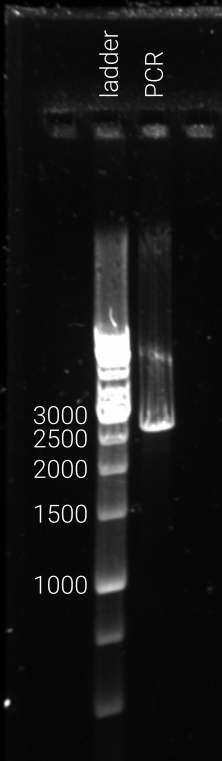

In [9]:
from IPython.display import Image
Image('../data/gels/annotated/20170130_tpp_uh_gfp_to_rfp.png', width=150)

The yield of the PCR reaction was 66.9 ng/μL (50 μL).

### RFP Top10 transformation

It occurred to me yesterday that I probably could've saved a day by just transforming directly into MG1655 cells.  The library is quite small now (assuming the GFP to RFP PCR didn't introduce a bunch of mutations), so I wouldn't have had to worry about getting poor coverage.  And I got enough DNA from the PCR to send for sequencing, so I don't even need to miniprep for that, either.

In [14]:
record_transformants(
    (('rfp tpp uh', 3.02e4), 1000, 40, [15, 79+72]),
)

Library,Recover (μL),Plate (μL),# cfu/10⁵,# cfu/10⁴,# Transformants,# Unique,Coverage (%),Coverage (fold)
rfp tpp uh,1000,40,15,151,3.77×10⁷,30200,100.00%,1249.25x


### RFP MG1655 transformation

In [15]:
record_transformants(
    (('rfp tpp uh', 3.02e4), 1000, 40, [0, 19, 75+69]))

Library,Recover (μL),Plate (μL),# cfu/10⁵,# cfu/10⁴,# cfu/10³,# Transformants,# Unique,Coverage (%),Coverage (fold)
rfp tpp uh,1000,40,0,19,144,3.70×10⁶,30200,100.00%,122.67x


I'm not sure why this was such a bad transformation.  I didn't do the phenol-chloroform extraction, but I wouldn't expect that to make such a big difference.  In any case, it's more that good enough for this library.

### RFP screens

Third screen:
- Overnight volume: 4 μL
- Media volume: 1 mL
- Condition: holo
- Gate: 1.0% most on
- Event rate: 1,500 evt/sec
- Sort time: 1h00
- Coverage: 100.00% (99.17x)

Fourth screen:
- Overnight volume: 4 μL
- Media volume: 1 mL
- Condition: apo
- Gate: Narrow gate that focused on the most off cells, but excluded the ≈1.1% of the cells that were off apo or holo and included 0.8% of the apo population and 0.1% of the holo population.
- Event rate: 800 evt/sec
- Sort time: until 5000 cells collected.

There was an 8x difference between the apo and holo populations in the 4th screen, but the apo and holo populations should be much more distinct than that by the 4th screen, so I don't think I'll find anything really active in the colonies I plated.  The library looked good (in terms of sequencing data) until I tried to switch the spacer, so I'm going to repeat and optimize that step.  I'm also going to screen the gfp library along with the rfp library next time, to better atrtibute any problems to either the library or the spacer cloning.


### GFP to RFP PCR (2nd try)

The recommended $T_a$ (according to NEB) for the Dang GFP to RFP primers is 63°C.  Last time my $T_a$ was 60°C and I had one high molecular weight contaminant but nothing to suggest non-specific priming.  So I don't know how much a higher $T_a$ will help, or if it's worth doing a temperature gradient.

I thought the contaminant from last time was the dCas9 plasmid, because it was near 6kb (even though I did a DpnI digestion).  Maybe this time I can run some template DNA to compare.  I'll also plan to do a gel extraction to remove that contaminant if it appears again.

In [13]:
!../protocols/library_prep.py 1 63

1. Prepare each 10x primer mix:

   Reagent           Conc  Each Rxn
   ────────────────────────────────
   water                   38.00 μL
   forward primer  200 μM   1.00 μL
   reverse primer  200 μM   1.00 μL
   ────────────────────────────────
                           40.00 μL

2. Setup 1 PCR reaction and 1 negative control:

   Reagent             Conc   Each Rxn  Master Mix
   ───────────────────────────────────────────────
   water                      38.00 μL    76.00 μL
   primer mix           10x   10.00 μL            
   template DNA   100 pg/μL    2.00 μL     4.00 μL
   Q5 master mix         2x   50.00 μL   100.00 μL
   ───────────────────────────────────────────────
                             100.00 μL    90.00 μL/rxn

3. Run the following thermocycler protocol:

   98°C → 98°C → 63°C → 72°C → 72°C → 12°C
   0:30   0:10   0:20   2:00   2:00    ∞
         └──────────────────┘
                  35x

4. Add 1 μL (20 units) DpnI to each reaction and 
   incubate at 37°C 

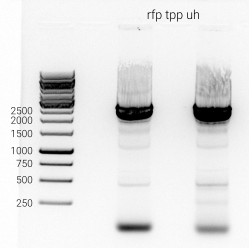

In [14]:
Image('../data/gels/annotated/20170206_tpp_uh_gfp_to_rfp.png')

I ran this gel at 88 V (8 V/cm) for 1h.  I just learned that 5-10 V/cm is the recommended voltage for TAE/TBE gels, and TAE gels should probably err on the low end of that range because acetate is a worse electrophoresis ion than borate.

The reaction isn't perfectly clean, but the contaminants are minor.  I had to enhance the contrast (1% saturated pixels) to see them.  

### Screen picks (1st try)

In [15]:
!../protocols/crispri_assay.py

1. Make overnight cultures of the designs you want to 
   test in LBCC.

2. Grow each culture with and without theophylline, 
   while inducing Cas9:

   - Subculture 4 μL of each overnight into 1 mL 
     EZCCA and 1 mL EZCCAT.

   - Grow at 37°C for at least 9h.

3. Dilute 1 μL of each culture into 199 μL PBS.

4. Measure the GFP fluorescence of each culture on 
   the BD LSRII flow cytometer.

   Loader Setting       Value    Laser         Voltage  Threshold
   ──────────────────────────    ────────────────────────────────
   Flow rate       0.5 μL/sec    FSC               400
   Sample volume        60 μL    SSC               250
   Mixing volume       100 μL    FITC              600           
   Mixing speed    180 μL/sec    PE-Texas Red      500        500
   Num mixes                2
   Wash volume         800 μL


- I grew 96 overnight cultures, 2 controls and 94 colonies from the screens.  There were clearly colonies that were either green, red, or somewhere in between.  I would expect the green ones to function better, because the sgRNAs should be active and repressing RFP, assuming the LB-agar plates have a high concentration of thiamine.  Nonetheless, because my intuition could be wrong, I tried to avoid biasing which colonies I picked by trying to pick all the colonies in one region of the plate before moving to a new region.

- I grew the day cultures in DWP.  Instead of EZCCA and EZCCAT, I used MACK and MACKT.

- I grew the cells for 9h before diluting them into PBS and doing flow cytometry, but in retrospect I probably should've grown them for longer.  I knew from the time-course that it take ≈10h before the signal for `tpp rxb 11,1` stops growing, so 9h is already on the short side, and to make things worse the cells probably grow slower in DWP.

- The RFP signal was not very bright (less than 10³), so I increased the PE-Texas Red-A laser voltage from 500V to 650V.  I kept the GFP laser at 600V, after experimenting with 650V.  This gave signal more in line with what I usually get, but still only a 25.1x difference between my positive and negative control.  I'm attributing this weak signal to the cells having only grown for 9h.

- The library had a number of members with ≈4x activities.  That's better than I expected, given how badly the screen seemed to go.  Still, it's not good enough, and I think I can do better with a clean library and a more enriched population.

<IPython.core.display.Javascript object>


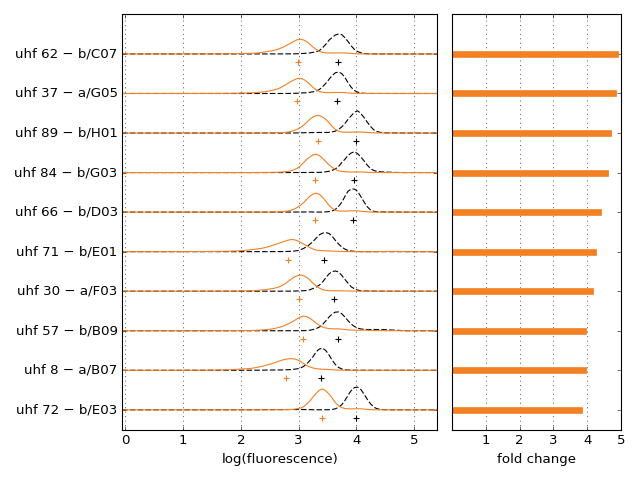

In [1]:
sys.path.append('../flow_cytometry')
from fold_change import fold_change
from nonstdlib import indices_from_str
fold_change(
    '../data/facs/20170207_screen_uhf_picks.py',
    sort_by='f',
    indices=indices_from_str('1-10'),
)

### RFP MG1655 transformation (2nd try)

I transformed the library into both MG1655 and Top10.  I realized last time that I could probably skip the Top10 transformation, but I dediced to do both this time to play it safe.  Both transformations worked more than well enough for the library size I think I have, although the Top10 transformation in particular worked really well.

In [29]:
record_transformants(
    (('rfp tpp uh (MG1655)', 3.02e4), 1000, 40, [4, 23+33]),
    (('rfp tpp uh (Top10)',  3.02e4), 1000, 40, [54+47]),
)

Library,Recover (μL),Plate (μL),# cfu/10⁵,# cfu/10⁴,# Transformants,# Unique,Coverage (%),Coverage (fold)
rfp tpp uh (MG1655),1000,40,4,56,1.36×10⁷,30200,100.00%,451.54x
rfp tpp uh (Top10),1000,40,101,lawn,2.52×10⁸,30200,100.00%,8360.93x


The sequencing data looks good enough.  As much as half the population has a point mutation/insertion/deletion where the primers were ligated together, but the rest seems correct.  Any mistakes would be in the targeting sequence, so I should get rid of most of them by screening for "on-like" designs. 

### RFP screens (2nd try)

In [28]:
!../protocols/library_screen.py 2

1. Make overnight cultures for the library and the 
   controls.

   - Thaw a glycerol stock of MG1655 cells containing 
     the library on ice for ≈10 min.

   - Add 1 mL of thawed glycerol stock to 50 mL LBCC.

   - Inoculate 1 mL LBCC with stabs from glycerol 
     stocks for the positive and negative controls.

   - Grow all the cultures overnight at 37°C.

2. Grow the library and the controls with and without 
   theophylline, while inducing Cas9.

   - Dilute enough of the library to get at least 10x 
     coverage into 250 volumes of EZCCA and EZCCAT.  
     Use at least 1 mL of media.

     My saturated cultures have an OD600 of ≈3.0, 
     which corresponds to ≈2.4×10⁶ cells/μL.  For a 
     library of 5×10⁷, 10x coverage is ≈200 μL.

   Overnight volume:           Media volume:

   - Make a glycerol stock of the library (1 mL 
     overnight culture, 333 μL 80% glycerol).

   - Subculture 4 μL of each control into 250 volumes 
     (i.e. 1 mL) EZCCA and EZCCAT.

   - Grow at

In [10]:
import sys; sys.path.append('../scripts')
from debrief_screen import Library
uh = Library(3.02e4)
uh.debrief_screen(
        overnight_vol='4 μL',
        media_vol='1 mL',
        condition='holo',
        report_path='../data/facs/20170208_screen_rfp_tpp_uh/sort_report.csv',
        fraction_picked=1.0,
)

### Screen picks (2nd try)

I noticed when preparing the day cultures that the holo media was noticeably more cloudy than the apo media.  (I was using the unaliquoted portion of the media that I'd kept in the 4°C.)  I'm not really sure, but I think the frozen aliquots of this media are clear apo or holo.  I was worried that cells might grow differently between the two media, but the apo and holo controls were indistinguishable.  I'm also worried that the thiamine itself degraded or crashed out (although I store thiamine at 4°C in the dark, and thiamine is extremely water soluble), but the picks still clearly responded to something.  Perhaps they would've responded more with aliquoted media.

<IPython.core.display.Javascript object>


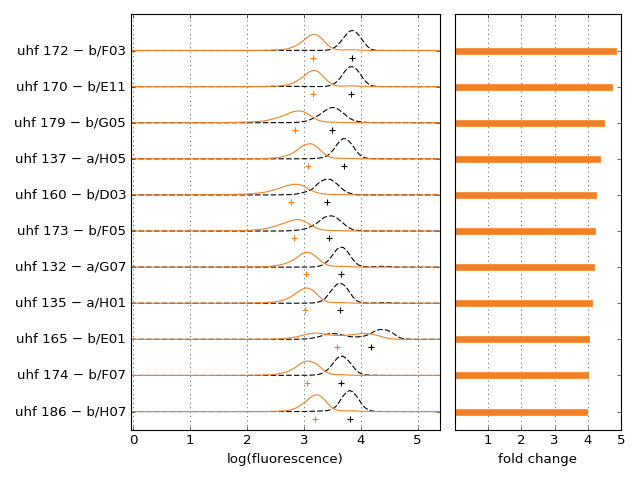

In [13]:
sys.path.append('../flow_cytometry')
from fold_change import fold_change
from nonstdlib import indices_from_str
fold_change(
    '../data/facs/20170214_screen_uhf_picks.py',
    sort_by='f',
    indices=indices_from_str('1-11'),
)

### Confirm hits

1. Inoculate an overnight culture in LB + Carb + Chlor for each colony I isolated from my two screens, regardless of whether or not another colony ended up having the same sequence.  I started uhf 8 - uhf 84 from glycerol stocks, and all the other constructs (including the controls) from fresh colonies.  I grew the overnight cultures (22 in total) in a 24-well block.

2. The next morning, subculture 4 μL of each overnight culture into 1 mL MACK and 1 mL MACKT in two 24-well blocks.  Grow the apo and holo cultures for each construct in adjacent wells.  I'm pretty sure I pipetted the wrong cells into well C2 of the second block (mhf 174 instead of mhf 173), so I put mhf 173 in well C4 and added another replicate of mhf 174 (in case I acually didn't make a mistake in C2) in wells D3 and D4.

3. Incubate with shaking at 37°C for 9h.

4. Dilute 0.5 μL of each culture into 200 μL PBS in a 96-well plate.  Leave a blank well (i.e. with just PBS) in between each well with cells.

5. Record data on the LSRII.  I kept the PE-Texas Red laser at 650V, as per the previous two experiments with these contructs.

<IPython.core.display.Javascript object>


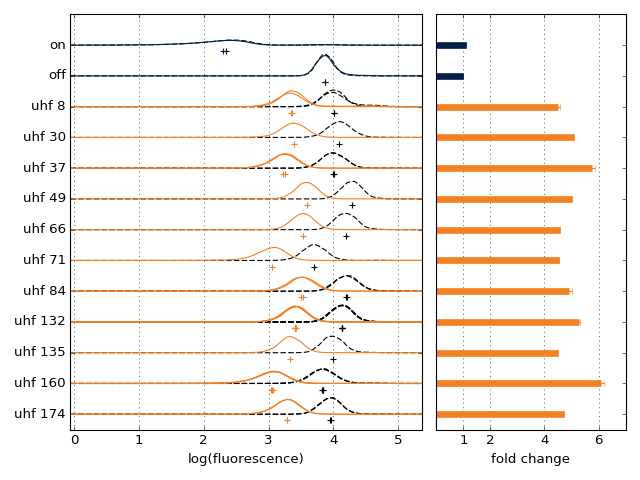

In [1]:
sys.path.append('../flow_cytometry')
from fold_change import fold_change
from nonstdlib import indices_from_str
fold_change('../data/facs/20170216_confirm_uhf_hits.yml')

I thought the fold changes might be better when the cells were grown with better aeration in a 24-well block rather than a 96-well block, but the difference is minor.  Overall, the fold changes for these constructs increased a little bit (from 4-5x to 5-6x).  

However, it's also imporant to note that the fold change between the controls is only 34.9x.  This is compared to 25.3x and 18.6x for the two screens (both grown 9h in 96-well blocks) and 69.9x for the initial experiment I did with tpp rxb 11,1 (at the 9h timepoint; it increased to 73.7x by 10h, and the 11h data looked unreliable).  I don't know why the controls were not further apart (and more similar to my initial time course) in this experiment, but it still may be that I could get closer to 10x just by improving the dynamic range.

I also don't know why so many of the apo traces appear to be brighter than the negative control.  It makes me think that the cells are producing significant amounts of fluorescent protein while they're sitting in PBS waiting to be measured (the whole plate took about 1h to run).  Perhaps there's not enough nutrients to grow in PBS, so the growth pathways shut down, but the Cas9 system and the fluorescent proteins are on strong constitutive promoters, so they keep getting made without competition.  Next time I should run the controls both before and after my samples, to see if that's really making a difference.  I could also try just letting my whole plate sit in PBS for an hour or two before measuring.

Finally, the question is whether or not these ≈5x designs are good enough to publish.  I don't think they're good enough to be useful, both because 5x isn't that much of a change and making media without thiamine is pretty annoying.  But they do demonstrate that the screen can work on molecules that aren't theophylline and that aptamer insertion is a general, if not flawless, strategy for modulating sgRNA.  That's probably enough to merit inclusion.

I have 11 unique designs.  Almost all of them have unexpected point mutations, and many need to be freshly cloned because they picked up multiple copies of the promoter and spacer sequences.  Thats (11 designs) × (4 spacers) × (2 variants) = 88 constructs.  That's a lot.  I'll have to think if I want to devote a lot of time to that, or if I want to focus more on setting up a screen in yeast.  Maybe I could start by focusing on the 4 most promising hits.